# Bibliotecas

In [38]:
import pandas as pd
import numpy as np
import datetime
#import pandas_datareader as pdr

import yfinance as yf

import matplotlib.pyplot as plt
from matplotlib import colormaps
from cycler import cycler


# Listas de Ativos

AÇÕES/ETF's BR:

<pre>
ABCD4.SA - ABEV3.SA - AGRI11.SA - ALUP11.SA - ARZZ3.SA - B3SA3.SA - B5P211.SA - BBAS3.SA
BBDC4.SA - BCSA34.SA - BPAC11.SA - BRFS3.SA - CCRO3.SA - COGN3.SA - CSAN3.SA - CVCB3.SA
DESK3.SA - EMBR3.SA - EZTC3.SA - FLRY3.SA - GGBR4.SA - GMAT3.SA - HBSA3.SA - IB5M11.SA
IGTI11.SA - IMAB11.SA - IRFM11.SA - ITSA4.SA - ITUB4.SA - JBSS3.SA - KLBN3.SA - LREN3.SA
LWSA3.SA - MELI34.SA - MOVI3.SA - MRFG3.SA - NUTR3.SA - PETR4.SA - PETZ3.SA - PORT3.SA
PRIO3.SA - RAIL3.SA - RDOR3.SA - ROXO34.SA - RRRP3.SA - SLCE3.SA - SMTO3.SA - SOMA3.SA
SUZB3.SA - TAEE11.SA - TIMS3.SA - VALE3.SA - VITT3.SA - VIVT3.SA - WEGE3.SA - YDUQ3.SA
</pre>
LISTA DE ETF's Americanas: 
<pre>
SPY - XLB - XLF - XLI - XLK - XLP - XLU - XLV - XLY - XTN - EWJ - EWG - EEM - TLT - GLD
</pre>

# Procurando Ativo

In [55]:
acao = input('Cole aqui o Ticker da Ação: ')

ticker_data = yf.Ticker(acao)

# Obtenha os dados históricos
historical_data = ticker_data.history(period="6mo")

# Fechamento semanal
weekly_closing_data = historical_data['Close'].resample('W').last()

# Exiba os dados
fechamentoSemanal = pd.DataFrame({'DATE': weekly_closing_data.index, 'CLOSE': weekly_closing_data.values})

# Criar xticks
listaData = fechamentoSemanal['DATE'].tolist()
def create_xlab(listaData):
    dicMes = {
        '01': 'JAN', 
        '02': 'FEV', 
        '03': 'MAR', 
        '04': 'ABR', 
        '05': 'MAI', 
        '06': 'JUN', 
        '07': 'JUL', 
        '08': 'AGO', 
        '09': 'SET', 
        '10': 'OUT', 
        '11': 'NOV', 
        '12': 'DEZ'}
    vetorXLab = []

    for data in listaData:
        dia = data.day
        if dia < 10:
            dia = '0' + str(dia)
        else:
            dia = str(dia)
        
        mes = data.month
        if mes < 10:
            mes = '0' + str(mes)
        else:
            mes = str(mes)
        nomeMes = dicMes[mes]

        vetorXLab.append(f'{dia}/{nomeMes}')
    
    return vetorXLab

diaMes = create_xlab(listaData)
diaMes = pd.DataFrame({'diaMes' : diaMes})

fechamentoSemanal['diaMes'] = diaMes['diaMes']

diaMes = diaMes['diaMes'].tolist()

# Criar contagem de semana
ct_week = []
for i in range(0, len(fechamentoSemanal['CLOSE'])):
    if i < 9:
        k = '0' + str(i+1)
    else:
        k = str(i+1)
    ct_week.append(f'Sem. {k}')

fechamento = fechamentoSemanal['CLOSE'].tolist()




# Gráfico de Ativo

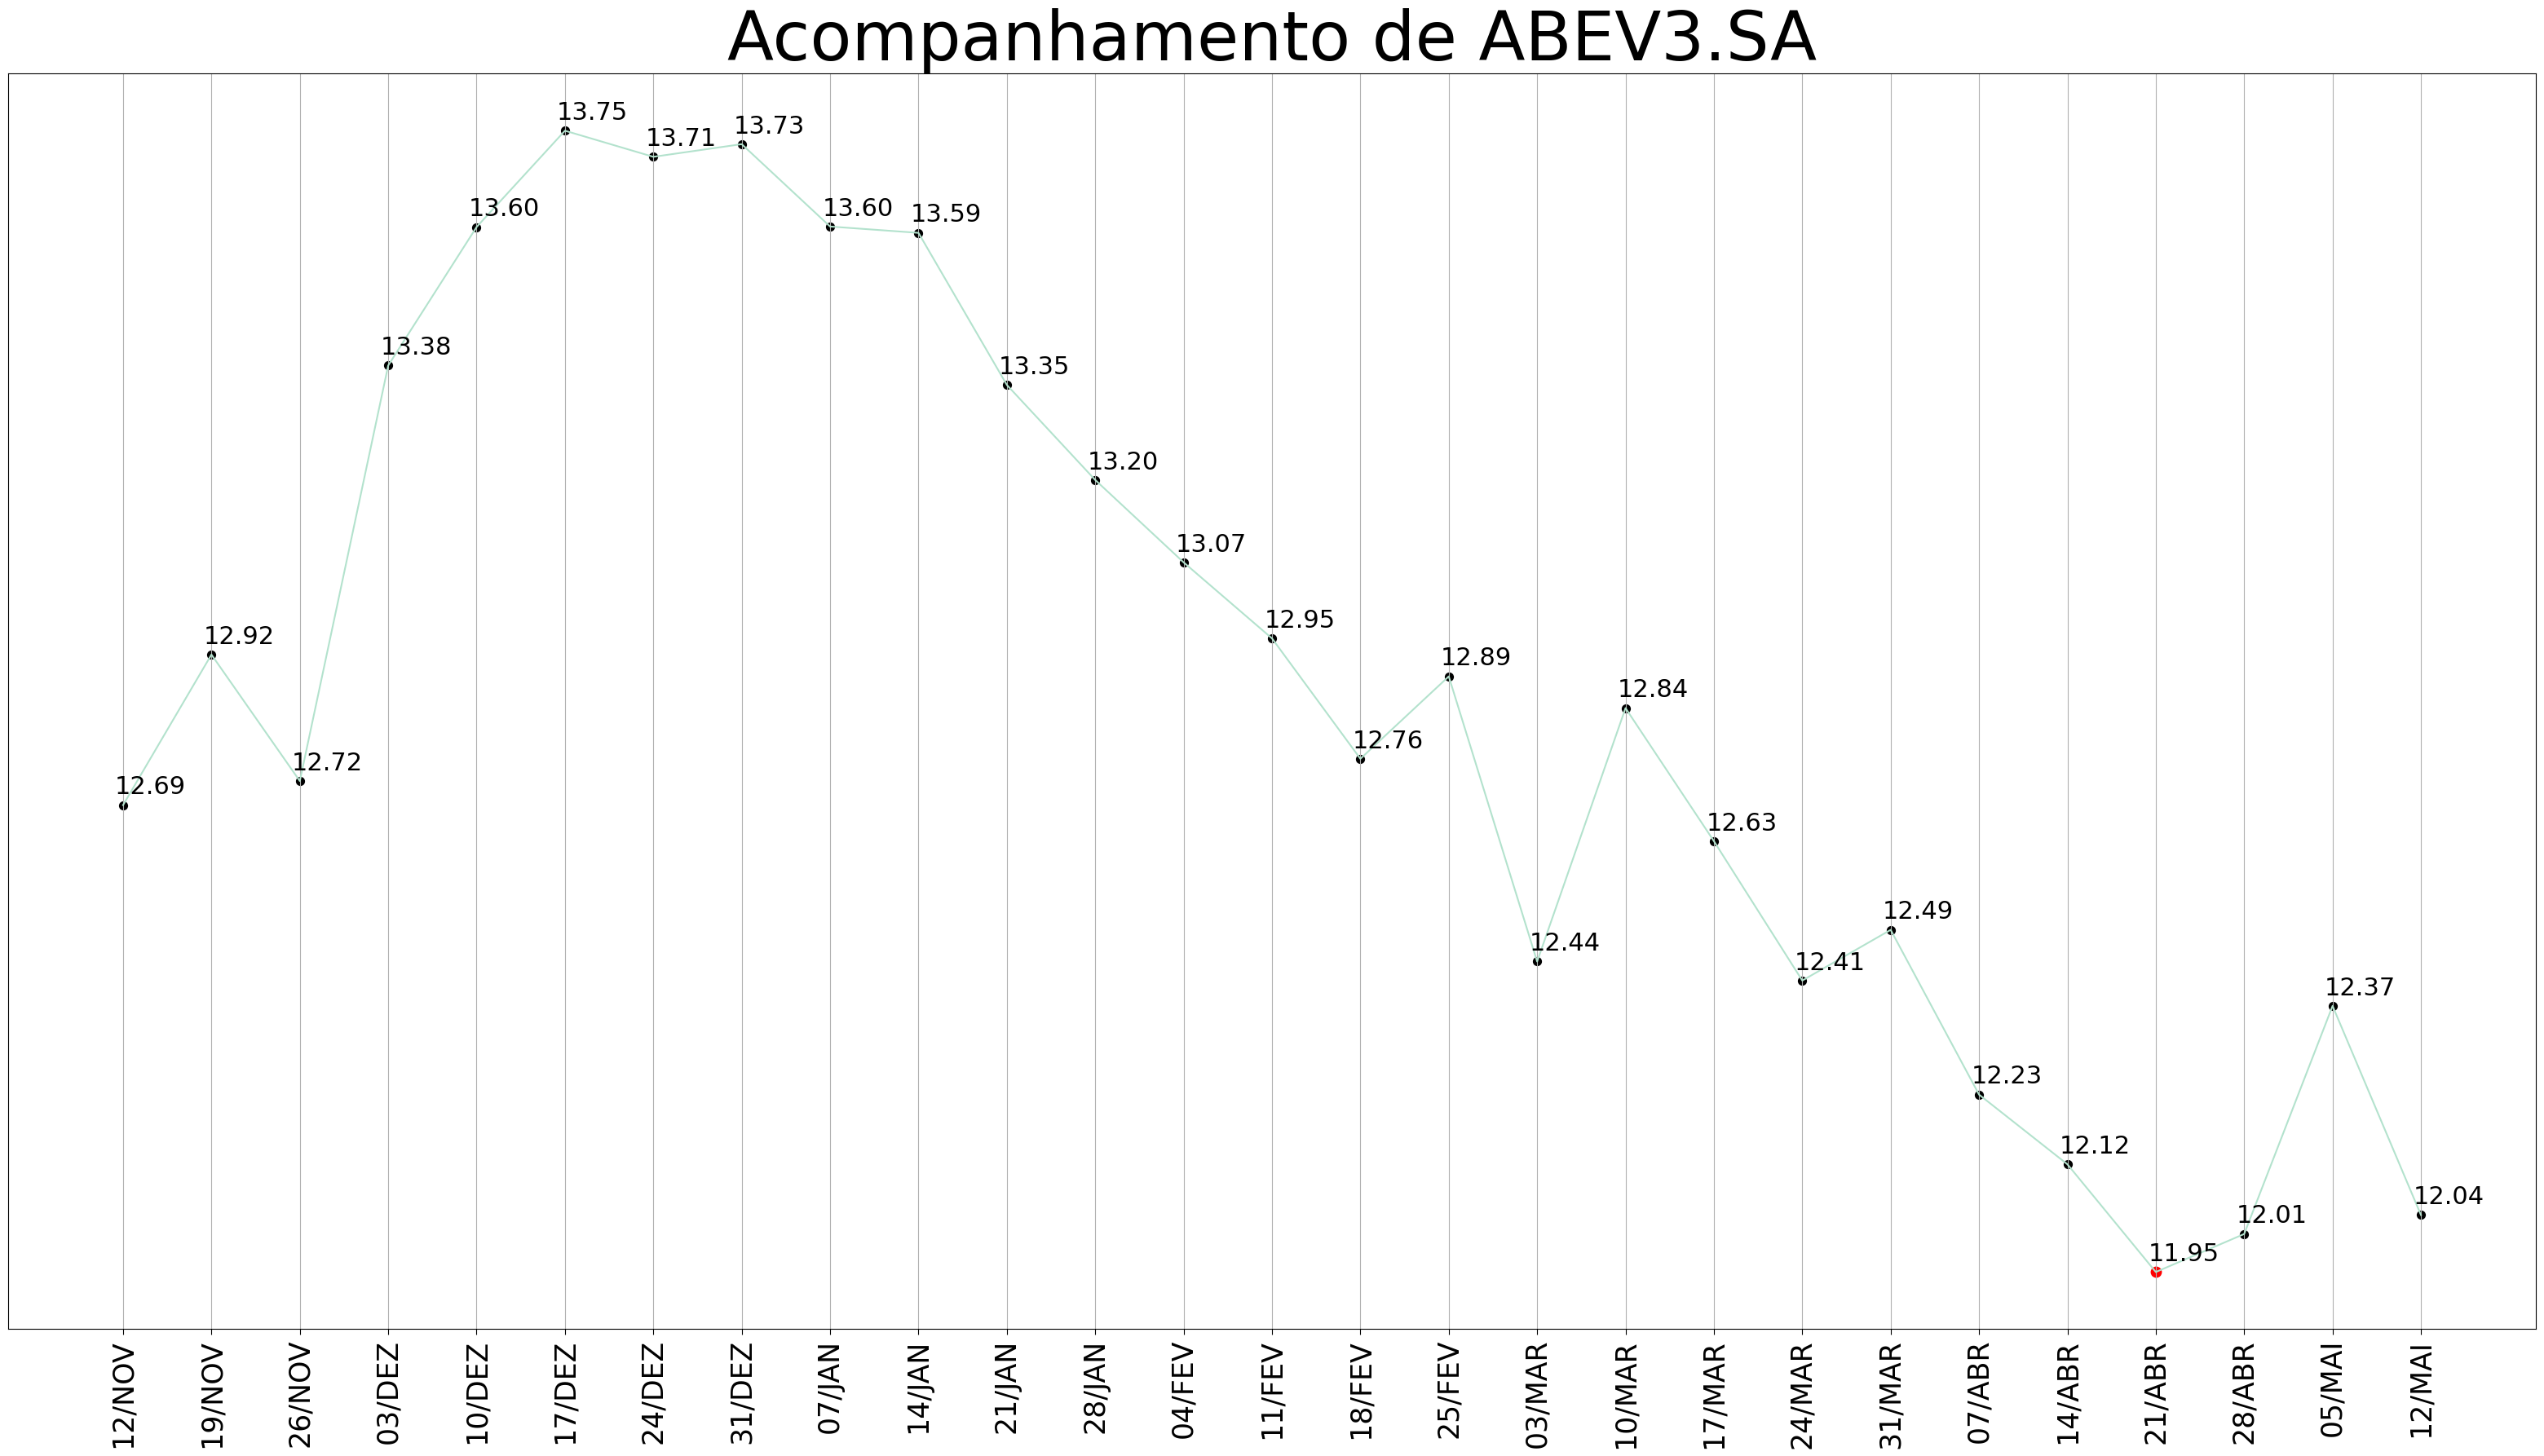

In [62]:
cores = plt.get_cmap('Pastel2').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

plt.figure(figsize=(40, 20))
plt.plot(diaMes, fechamento)

marcadores = np.where(fechamento == np.min(fechamento), 'x', 'o')
for posicao, marcador in enumerate(marcadores):
    if marcador == 'x':
        cor = 'red'
        tamanho = 80
    else:
        cor = 'black'
        tamanho = 50
    plt.scatter(diaMes[posicao], fechamento[posicao], marker='o', 
						    s=tamanho, color=cor)
    plt.annotate('{:.2f}'.format(fechamento[posicao]), color='black', xy=(diaMes[posicao],
						     fechamento[posicao]), xytext=(-7, 10),
						     textcoords='offset points', size = 22)

plt.xticks(diaMes, rotation=90, fontsize=25)

plt.title(f'Acompanhamento de {acao}', fontsize = 60)

plt.yticks([])
plt.tick_params(axis='x', length=5)
plt.box(True)
plt.grid(True)
plt.show()